In [1]:
# Importing Required Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [28]:

# header=0 doens't work, header=None simply inserts intergers as column names
df_train = pd.read_csv(r"./ticdata2000.txt", sep='\t', header=None, low_memory=False) # Training set
df_test=pd.read_csv(r"./ticeval2000.txt", sep='\t', header=None, low_memory=False) # Training set
df_target=pd.read_csv(r"./tictgts2000.txt", sep='\t', header=None, low_memory=False) # Training set

In [55]:
df_train

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies 0 - 1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train_x=df_train.iloc[:,:-1]
tarin_y=df_train['Number of mobile home policies 0 - 1']

In [42]:
df_test

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_target.columns=['target']
df_target

,target
0,0
1,1
2,0
3,0
4,0
...,...
3995,0
3996,1
3997,0
3998,0


In [84]:
df_target['target'].unique()


array([0, 1], dtype=int64)

In [32]:
df_train.columns=['Customer Subtype see L0', 'Number of houses 1  10',
       'Avg size household 1  6', 'Avg age see L1',
       'Customer main type see L2', 'Roman catholic see L3', 'Protestant ...',
       'Other religion', 'No religion', 'Married', 'Living together',
       'Other relation', 'Singles', 'Household without children',
       'Household with children', 'High level education',
       'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers',
       'Unskilled labourers', 'Social class A', 'Social class B1',
       'Social class B2', 'Social class C', 'Social class D', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance see L4',
       'Contribution third party insurance (firms) ...',
       'Contribution third party insurane (agriculture)',
       'Contribution car policies', 'Contribution delivery van policies',
       'Contribution motorcycle/scooter policies',
       'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies',
       'Contribution agricultural machines policies',
       'Contribution moped policies', 'Contribution life insurances',
       'Contribution private accident insurance policies',
       'Contribution family accidents insurance policies',
       'Contribution disability insurance policies',
       'Contribution fire policies', 'Contribution surfboard policies',
       'Contribution boat policies', 'Contribution bicycle policies',
       'Contribution property insurance policies',
       'Contribution social security insurance policies',
       'Number of private third party insurance 1 - 12',
       'Number of third party insurance (firms) ...',
       'Number of third party insurane (agriculture)',
       'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies',
       'Number of trailer policies', 'Number of tractor policies',
       'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances',
       'Number of private accident insurance policies',
       'Number of family accidents insurance policies',
       'Number of disability insurance policies', 'Number of fire policies',
       'Number of surfboard policies', 'Number of boat policies',
       'Number of bicycle policies', 'Number of property insurance policies',
       'Number of social security insurance policies',
       'Number of mobile home policies 0 - 1']
    

In [33]:
df_train.head()

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies 0 - 1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [35]:
df_test.columns=['Customer Subtype see L0', 'Number of houses 1  10',
       'Avg size household 1  6', 'Avg age see L1',
       'Customer main type see L2', 'Roman catholic see L3', 'Protestant ...',
       'Other religion', 'No religion', 'Married', 'Living together',
       'Other relation', 'Singles', 'Household without children',
       'Household with children', 'High level education',
       'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers',
       'Unskilled labourers', 'Social class A', 'Social class B1',
       'Social class B2', 'Social class C', 'Social class D', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance see L4',
       'Contribution third party insurance (firms) ...',
       'Contribution third party insurane (agriculture)',
       'Contribution car policies', 'Contribution delivery van policies',
       'Contribution motorcycle/scooter policies',
       'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies',
       'Contribution agricultural machines policies',
       'Contribution moped policies', 'Contribution life insurances',
       'Contribution private accident insurance policies',
       'Contribution family accidents insurance policies',
       'Contribution disability insurance policies',
       'Contribution fire policies', 'Contribution surfboard policies',
       'Contribution boat policies', 'Contribution bicycle policies',
       'Contribution property insurance policies',
       'Contribution social security insurance policies',
       'Number of private third party insurance 1 - 12',
       'Number of third party insurance (firms) ...',
       'Number of third party insurane (agriculture)',
       'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies',
       'Number of trailer policies', 'Number of tractor policies',
       'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances',
       'Number of private accident insurance policies',
       'Number of family accidents insurance policies',
       'Number of disability insurance policies', 'Number of fire policies',
       'Number of surfboard policies', 'Number of boat policies',
       'Number of bicycle policies', 'Number of property insurance policies',
       'Number of social security insurance policies'
       ]
    

## Model Creation (XG Boost)

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df_train=scaler.fit_transform(train_x)

In [39]:
scaled_df_test=scaler.fit_transform(df_test)

In [59]:
# fit model no training data
model = XGBClassifier()
model.fit(scaled_df_train,tarin_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(tarin_y,predictions)
accuracy

0.9402267262109241

In [62]:
# cheking initial test accuracy
y_pred = model.predict(df_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(df_target,predictions)
accuracy

0.9405

In [63]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [64]:
# Grid Searchcv
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)

In [65]:
grid.fit(train_x,tarin_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=

C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1382, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\Dhvani\anaconda3\lib\site-pac

ValueError: feature_names must be string, and may not contain [, ] or <

In [66]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [70]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 10)
new_model.fit(scaled_df_train,tarin_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
y_pred_new = new_model.predict(df_test)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(df_target,predictions_new)
accuracy_new

0.92525

In [79]:
def confusion(model):
    
    # Creats a confusion matrix/heatmap for the logistic regression models predicted values
    from sklearn.metrics import confusion_matrix
    
    y_pred = model.predict(df_test)
    confusion_mc = confusion_matrix(df_target, y_pred_new)
    df_cm = pd.DataFrame(confusion_mc)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Model Accuracy:{:.3f}'.format(model.score(df_test, df_target)))

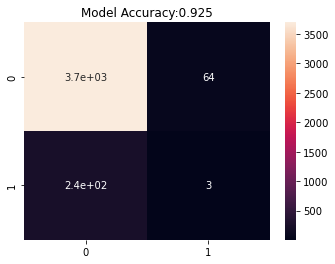

In [80]:
confusion(new_model)

## Model Creation (CAt Boost)

In [85]:
from catboost import CatBoostClassifier
train_x
tarin_y
df_test
df_target

In [86]:
scores1 = []
scores2 = []
scores3 = []
cat = CatBoostClassifier(iterations=50, depth=6, verbose=False) 
cat.fit(train_x, tarin_y)
scores1.append(cat.score(df_test, df_target))

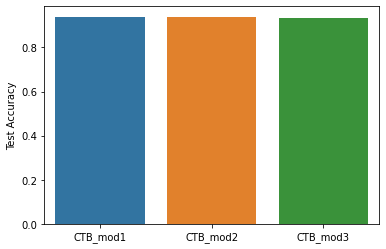

In [88]:
cat = CatBoostClassifier(iterations=100, depth=8, verbose=False)
cat.fit(train_x, tarin_y)
scores2.append(cat.score(df_test, df_target))

cat = CatBoostClassifier(iterations=200, depth=12, verbose=False)
cat.fit(train_x, tarin_y)
scores3.append(cat.score(df_test, df_target))
    
sns.barplot(data=[scores1, scores2, scores3])
plt.xticks([0,1,2], ['CTB_mod1', 'CTB_mod2', 'CTB_mod3'])
plt.ylabel('Test Accuracy'); plt.show()

In [91]:
print(scores1)
print(scores3)

[0.9365]
[0.93475]


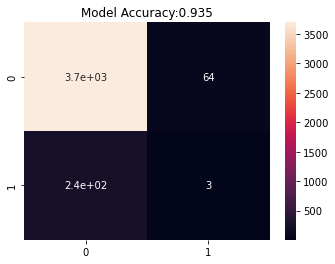

In [92]:
confusion(cat)